# UNSUPERVISED LEARNING

# CLUSTERING(HIERACHICAL CLUSTERING)(DISTANCE BASED)
1.AGGLOMERATIVE
2.DIVISIVE

#  MIXTEND

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
clf2 = RandomForestClassifier(random_state=0, n_estimators=100)
clf3 = SVC(random_state=0, probability=True, gamma='auto')
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

ModuleNotFoundError: No module named 'mlxtend'

# Ward's AGGLOMETRIC METHOD

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
from sklearn.datasets.samples_generator import make_blobs

C:\Users\SANDY\Anaconda3\envs\ml_2020\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
X, y = make_blobs(n_samples=600, centers=5,
                  cluster_std=0.60, random_state=42)

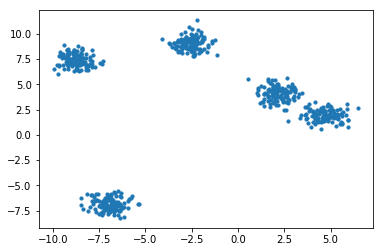

In [6]:
plt.scatter(X[:,0],X[:,1],s=10)

# Dendrogram

In [9]:
from scipy.cluster.hierarchy import ward,dendrogram,linkage

In [10]:
Distance=linkage(X,'ward')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [10.0, 10.0, 40.0, 40.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [102.5, 102.5, 132.5, 132.5],
  [72.5, 72.5, 117.5, 117.5],
  [25.0, 25.0, 95.0, 95.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [180.0, 180.0, 202.5, 202.5],
  [160.0, 160.0, 191.25, 191.25],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [275.0, 275.0, 285.0, 285.0],
  [252.5, 252.5, 280.0, 280.0],
  [230.0, 230.0, 266.25, 266.25],
  [175.625, 175.625, 248.125, 248.125],
  [60.0, 60.0, 211.875, 211.875],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [335.0, 335.0, 345.0

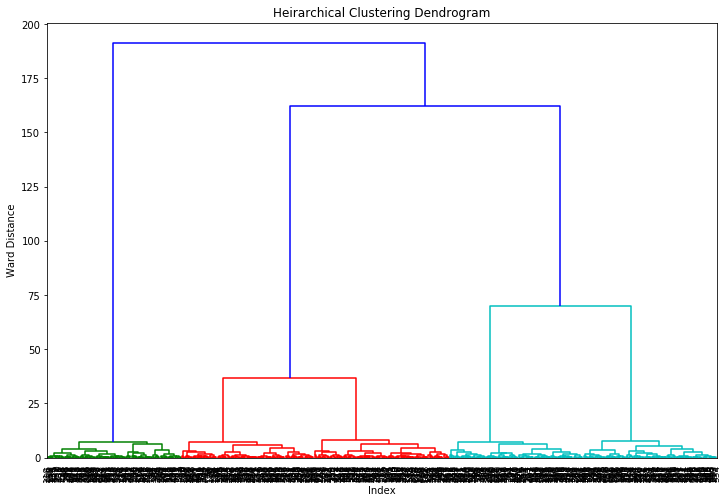

In [12]:
plt.figure(figsize=(12,8))
plt.title("Heirarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward Distance")
dendrogram(Distance,leaf_rotation=90.,leaf_font_size=9.,)

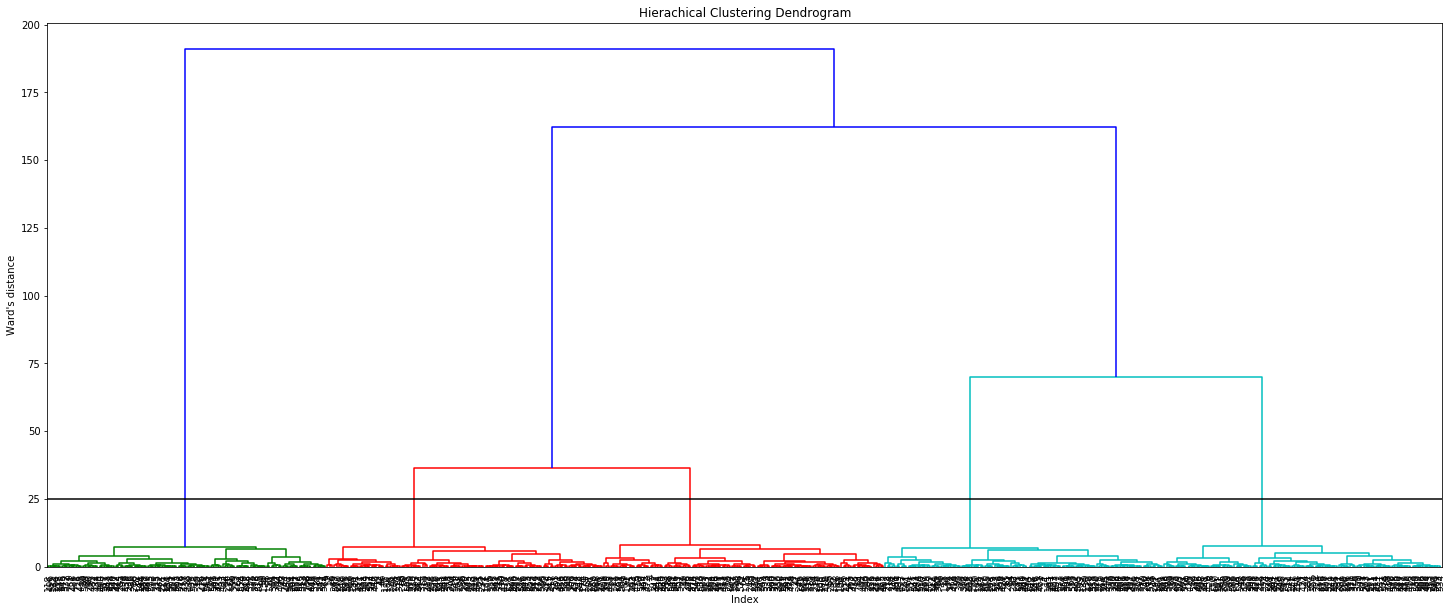

In [14]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(Distance,
           leaf_rotation=90.,
           leaf_font_size=9.,);
plt.axhline(25, c='k');

# Truncating Dendrogram

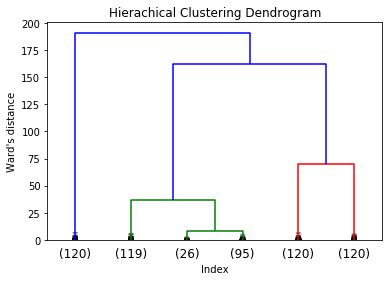

In [22]:
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(Distance,p=6,truncate_mode='lastp',leaf_font_size=12.,show_contracted=True);

           

# Retrieve clusters

# Use of fcluster function

In [23]:
from scipy.cluster.hierarchy import fcluster

In [32]:
max_d=25
clusters=fcluster(Distance,max_d,criterion='distance')
clusters

array([1, 1, 5, 3, 3, 2, 3, 4, 5, 2, 1, 5, 2, 4, 4, 1, 4, 3, 5, 3, 4, 3,
       2, 5, 5, 2, 2, 3, 3, 3, 1, 4, 5, 1, 1, 3, 2, 2, 1, 4, 3, 2, 2, 1,
       1, 2, 2, 3, 5, 3, 4, 2, 1, 2, 4, 3, 4, 1, 1, 3, 2, 4, 1, 4, 3, 2,
       1, 3, 2, 2, 5, 3, 1, 3, 5, 1, 4, 5, 1, 5, 3, 1, 1, 3, 3, 4, 3, 1,
       5, 5, 5, 1, 4, 4, 2, 2, 4, 4, 3, 1, 3, 5, 4, 5, 5, 1, 3, 4, 3, 4,
       4, 5, 4, 3, 5, 2, 5, 4, 1, 1, 5, 5, 3, 3, 2, 4, 4, 4, 5, 2, 2, 1,
       1, 4, 3, 4, 2, 2, 2, 1, 5, 2, 2, 1, 4, 5, 4, 1, 2, 1, 5, 2, 1, 4,
       1, 4, 2, 3, 5, 5, 3, 3, 3, 4, 2, 4, 4, 3, 4, 1, 2, 2, 2, 4, 4, 3,
       2, 3, 4, 3, 2, 5, 3, 1, 1, 2, 4, 2, 5, 5, 2, 3, 4, 3, 1, 2, 5, 3,
       4, 2, 5, 4, 3, 5, 3, 5, 1, 1, 2, 2, 3, 3, 2, 3, 4, 1, 1, 5, 4, 2,
       2, 1, 5, 2, 5, 4, 1, 4, 3, 5, 2, 4, 2, 5, 3, 1, 1, 4, 4, 5, 4, 2,
       1, 3, 1, 3, 3, 4, 2, 2, 2, 1, 4, 5, 2, 3, 5, 1, 2, 2, 2, 4, 3, 1,
       3, 5, 1, 4, 4, 2, 2, 2, 1, 2, 3, 1, 3, 4, 5, 1, 5, 4, 5, 4, 4, 1,
       5, 2, 2, 3, 1, 1, 2, 1, 1, 5, 1, 3, 5, 4, 4,

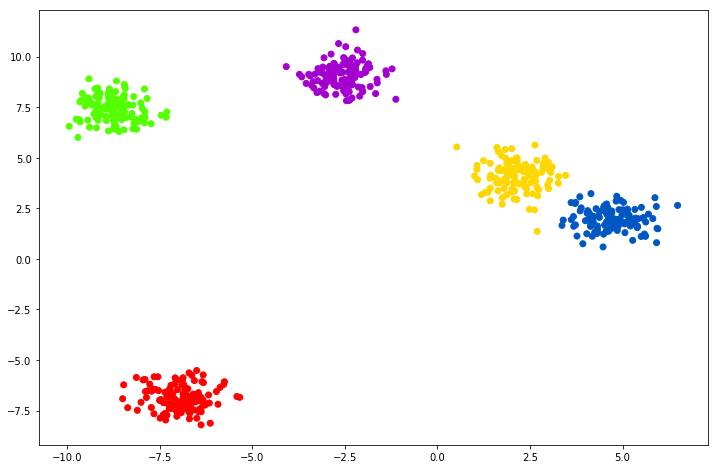

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=clusters,cmap='prism')

# By the help of clusters

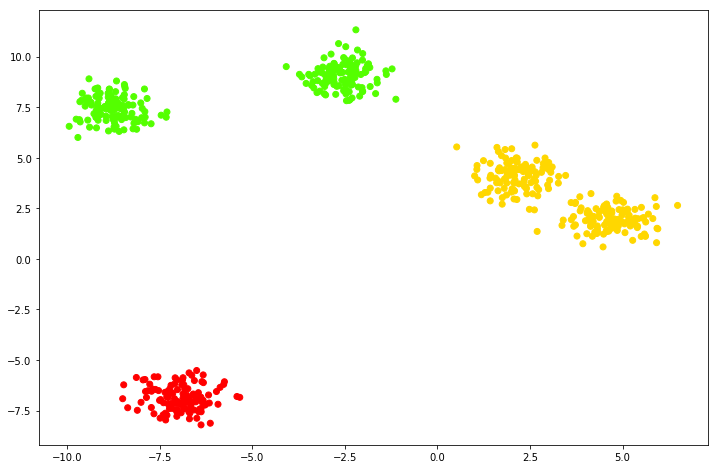

In [34]:
k=3
clusters=fcluster(Distance,k,criterion='maxclust')
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=clusters,cmap='prism')

# K means clustering

In [35]:
from sklearn.cluster import KMeans

In [44]:
km=KMeans(n_clusters=9)

In [45]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
y_km=km.predict(X)

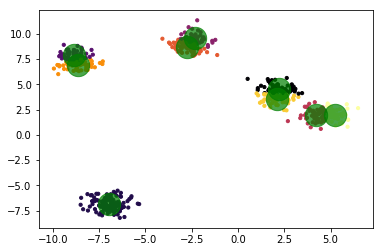

In [47]:
plt.scatter(X[:,0],X[:,1],s=10,c=y_km,cmap='inferno')
centers=km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],s=500,c='green',alpha=0.7)

# Elbow Method

In [48]:
km.inertia_

288.5254852652892

In [51]:
sse=[]
for k in range(1,8):
    km_=KMeans(n_clusters=k).fit(X)
    sse.append([k,km_.inertia_])

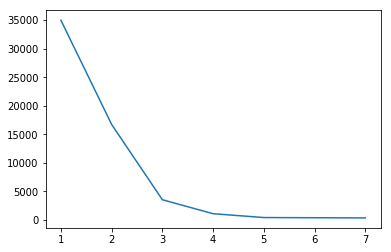

In [52]:
plt.plot(pd.DataFrame(sse)[0],pd.DataFrame(sse)[1])

from here we concluded that at 3 clusters kmeans work well

# Silhouette Analysis

In [57]:
from sklearn.metrics import silhouette_score
sse=[]
for k in range(2,8):
    km_=KMeans(n_clusters=k).fit(X)
    sse.append([k,silhouette_score(X,km_.labels_)])

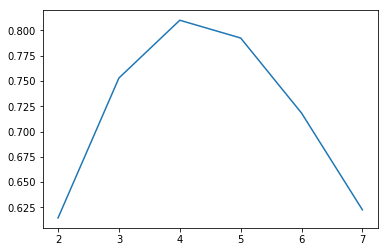

In [58]:
plt.plot(pd.DataFrame(sse)[0],pd.DataFrame(sse)[1])

from here peak says 4 will be n_clusters

# Mean Shift

In [59]:
from sklearn.cluster import MeanShift,estimate_bandwidth

In [60]:
Bandwidth_X=estimate_bandwidth(X,quantile=0.1,n_samples=len(X))

In [61]:
model=MeanShift(bandwidth=Bandwidth_X,bin_seeding=True)

In [64]:
model.fit(X)

MeanShift(bandwidth=0.9946702350329211, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [66]:
cluster_centers=model.cluster_centers_
print("\n Cluster Centers:\n",cluster_centers)


 Cluster Centers:
 [[-2.67328294  8.99938097]
 [ 4.68368104  1.95180624]
 [-8.78901201  7.46865483]
 [ 2.23745877  4.18435672]
 [-6.92346681 -7.03225928]]


In [69]:
labels=model.labels_
num_clusters=len(np.unique(labels))
print(num_clusters)

5
